In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [19]:
import deeplake

# Load the WikiArt dataset
ds = deeplake.load('hub://activeloop/wiki-art')

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/wiki-art



/

hub://activeloop/wiki-art loaded successfully.



In [7]:
tensor_names = ds.tensors.keys()
print(tensor_names)

dict_keys(['images', 'labels'])


In [15]:
# Access images and labels
images = ds['images']
images_len = len(images)
print(images_len)
labels = ds['labels']

81433


In [40]:
# Inspect labels
print(f"Labels shape: {ds['labels'].shape}")
print(f"Labels datatype: {type(ds['labels'][0])}")

# If possible, print the first few labels to understand their content
print("Example labels:")
for i in range(5):  # Adjust the range as needed
    print(ds['labels'][i].info)  # Assuming labels are tensors and you're interested in their content

Labels shape: (81433, 1)
Labels datatype: <class 'deeplake.core.tensor.Tensor'>
Example labels:
{'class_names': ['abstract_expressionism', 'action_painting', 'analytical_cubism', 'art_nouveau_modern', 'baroque', 'color_field_painting', 'contemporary_realism', 'cubism', 'early_renaissance', 'expressionism', 'fauvism', 'high_renaissance', 'impressionism', 'mannerism_late_renaissance', 'minimalism', 'naive_art_primitivism', 'new_realism', 'northern_renaissance', 'pointillism', 'pop_art', 'post_impressionism', 'realism', 'rococo', 'romanticism', 'symbolism', 'synthetic_cubism', 'ukiyo_e']}
{'class_names': ['abstract_expressionism', 'action_painting', 'analytical_cubism', 'art_nouveau_modern', 'baroque', 'color_field_painting', 'contemporary_realism', 'cubism', 'early_renaissance', 'expressionism', 'fauvism', 'high_renaissance', 'impressionism', 'mannerism_late_renaissance', 'minimalism', 'naive_art_primitivism', 'new_realism', 'northern_renaissance', 'pointillism', 'pop_art', 'post_impress

In [5]:
def get_image_path(art_style, painting, top_dir='archive'):
    path = f"{top_dir}/{art_style}/{painting}.jpg"
    return path

In [3]:
artemis_df = pd.read_csv('artemis/official_data/artemis_dataset_release_v0.csv')

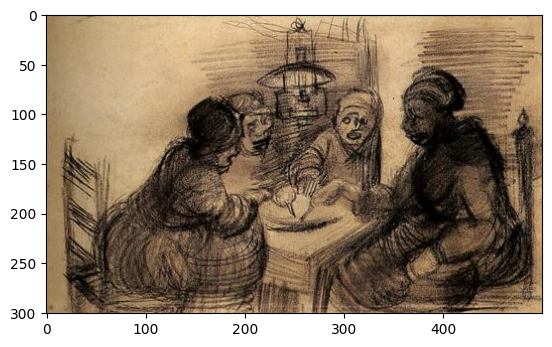

Art style: Realism
Painting: vincent-van-gogh_four-people-sharing-a-meal-1885(1)
emotion:  fear
utterance:  They look to be in a dark room, like a basement, and seem to all be wearing concern looks on their faces.


In [16]:
row = artemis_df.iloc[400]
art_style = row['art_style']
painting = row['painting']
image_path = get_image_path(art_style, painting)

img = Image.open(image_path)
plt.imshow(img)
plt.show()

print(f"Art style: {art_style}")
print(f"Painting: {painting}")
print("emotion: ", row['emotion'])
print("utterance: ", row['utterance'])


In [17]:
# initializing new dataframe
valid_images_df = pd.DataFrame(columns=artemis_df.columns)

In [19]:
# go through each row in the artemis dataset
valid_rows = []

for index, row in artemis_df.iterrows():
    art_style = row['art_style']
    painting = row['painting']
    image_path = get_image_path(art_style, painting)

    # check if the image exists in archive
    # if image found, save the row to list
    try:
        with Image.open(image_path):
            valid_rows.append(row)
    except FileNotFoundError:
        continue

# create a new dataframe with the valid rows
valid_images_df = pd.DataFrame(valid_rows, columns=artemis_df.columns)

# save the new dataframe to a csv file
valid_images_df.to_csv('artemis/official_data/valid_images.csv', index=False)